Importing the Dependencies

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [28]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv("C://Users//asus//Downloads//machine learning//Multiple-Disease-Prediction-using-Machine-Learning-1//dataset//diabetes.csv")


ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(768, 9)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart


🔧 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.7597

🔧 Training Random Forest...
✅ Random Forest Accuracy: 0.7208

🔧 Training Neural Network...
✅ Neural Network Accuracy: 0.6429

🔧 Training XGBoost...
✅ XGBoost Accuracy: 0.7403

🔧 Training HistGradientBoosting...
✅ HistGradientBoosting Accuracy: 0.7273

--- 📊 Model Accuracy Comparison ---
Logistic Regression: 0.7597 (75.97%)
Random Forest: 0.7208 (72.08%)
Neural Network: 0.6429 (64.29%)
XGBoost: 0.7403 (74.03%)
HistGradientBoosting: 0.7273 (72.73%)

🏆 Best Model: Logistic Regression (75.97%)


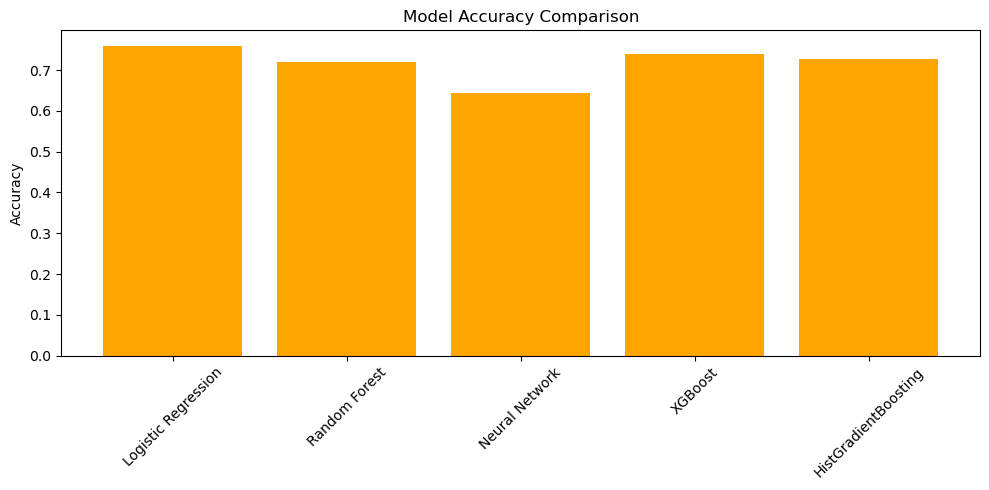

In [ ]:
# --- 1. Imports ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv("C:\\Users\\asus\\Downloads\\machine learning\\Multiple-Disease-Prediction-using-Machine-Learning-1\\dataset\\diabetes.csv")


X = heart_data.drop(columns='Outcome', axis=1)
Y = heart_data['Outcome']
feature_names = X.columns.tolist()

# --- 3. Split Data ---
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Define Top 5 Models ---
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=2),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=2),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, activation='relu', solver='adam', random_state=2),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=2)
}

# --- 5. Training and Evaluation ---
model_accuracies = {}
model_instances = {}
model_scalers = {}

for name, model in models.items():
    print(f"\n🔧 Training {name}...")

    if name in ["Logistic Regression", "Neural Network"]:
        model.fit(X_train_scaled, Y_train)
        Y_pred = model.predict(X_test_scaled)
        model_scalers[name] = scaler
    else:
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

    acc = accuracy_score(Y_test, Y_pred)
    model_accuracies[name] = acc
    model_instances[name] = model

    print(f"✅ {name} Accuracy: {acc:.4f}")

# --- 6. Model Comparison ---
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = model_instances[best_model_name]
best_model_scaler = model_scalers.get(best_model_name, None)

print("\n--- 📊 Model Accuracy Comparison ---")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f} ({acc*100:.2f}%)")

print(f"\n🏆 Best Model: {best_model_name} ({model_accuracies[best_model_name]*100:.2f}%)")

# --- 7. Bar Plot ---
plt.figure(figsize=(10, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='orange')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()



Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='Outcome', axis=1)
Y = heart_data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7850162866449512


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7532467532467533


Building a Predictive System

Saving the trained model

In [33]:
import pickle

In [34]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [36]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
